PyNILM - Optimizing Pipeline Hyperparameters
---



## Preparing Environment

In [1]:
# # COLAB VERSION
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)

In [1]:
import warnings
warnings.filterwarnings(action="ignore")

# TODO: Create PyNilm python package
import sys
sys.path.append('../') # enabling pynilm import (src content)

import numpy as np
import pandas as pd

from tqdm import tqdm
from pathlib import Path
from nilmtk.utils import print_dict
from collections import Counter
from matplotlib import pyplot as plt
from plotly import express as px
from plotly import io as pio
pio.renderers.default = 'vscode'

## Experiment Details - REDD

### Defining Experiment Configuration

In [2]:
# Dataset file
redd_filepath = '../data/redd.h5'
redd_filepath

'../data/redd.h5'

In [3]:
# experiment params
sample_period = 2
building_redd = 3
appliances_redd = ['washer dryer', 'microwave', 'dish washer', 'fridge']

### Loading Data - `Data Wrapper`

In [80]:
from src.data import DataWrapper

# Load data series between date start and finish (only train)
redd_train = DataWrapper(
    dataset_path=redd_filepath,
    building=building_redd, 
    appliances=appliances_redd,
    sample_period=sample_period,
    start='2011-04-01 00:00:00',
    end='2011-05-31 23:59:59',
    return_mode='dataframe',
    windows_size=None,
    windows_stride=None,
    get_activations=True,
    activations_type=int,
    debug=False
    )

Loading data for meter ElecMeterID(instance=1, building=3, dataset='REDD')     

Loading data for meter ElecMeterID(instance=2, building=3, dataset='REDD')     
Done loading data all meters for this chunk.
Loading data for meter ElecMeterID(instance=14, building=3, dataset='REDD')     
Done loading data all meters for this chunk.
Loading data for meter ElecMeterID(instance=16, building=3, dataset='REDD')     
Done loading data all meters for this chunk.
Loading data for meter ElecMeterID(instance=9, building=3, dataset='REDD')     
Done loading data all meters for this chunk.
Loading data for meter ElecMeterID(instance=7, building=3, dataset='REDD')     
Done loading data all meters for this chunk.


## Optimizing Window

### Hypothesis 1 - Extracting Appliance Activations Period

House #1


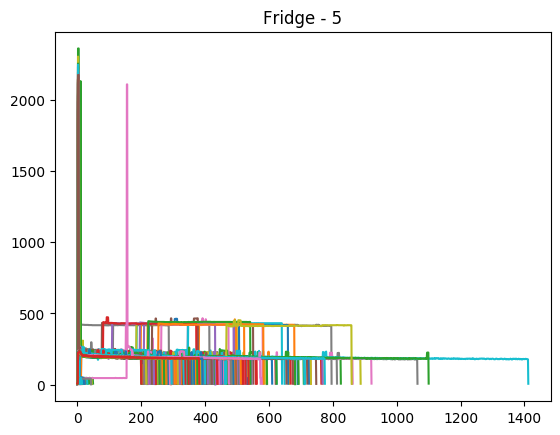

Appliance: Fridge - 5
    min_on_duration: 20
    total_activations: 724
    min(activations_duration): 27.0 segundos
    min(activations_length): 10


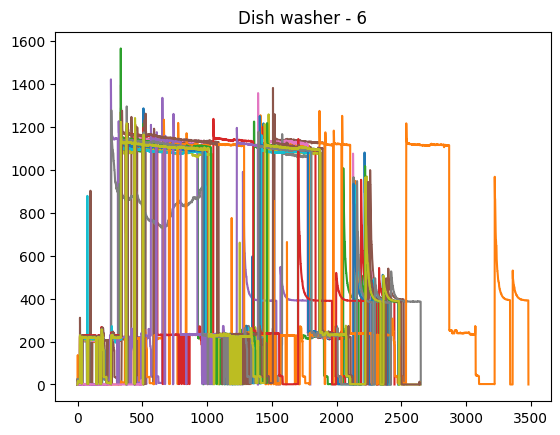

Appliance: Dish washer - 6
    min_on_duration: 600
    total_activations: 19
    min(activations_duration): 1482.0 segundos
    min(activations_length): 495


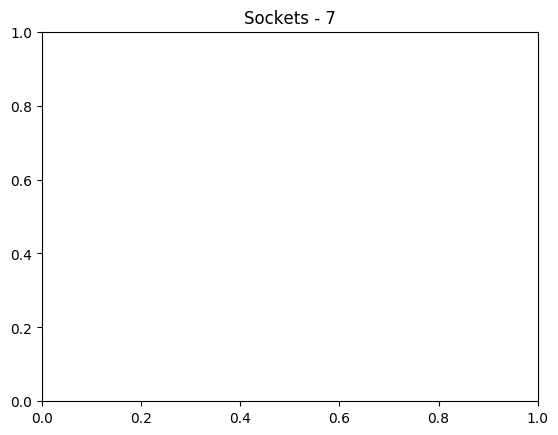

Appliance: Sockets - 7
    min_on_duration: 20
    total_activations: 0
    min(activations_duration): 0 segundos
    min(activations_length): 0


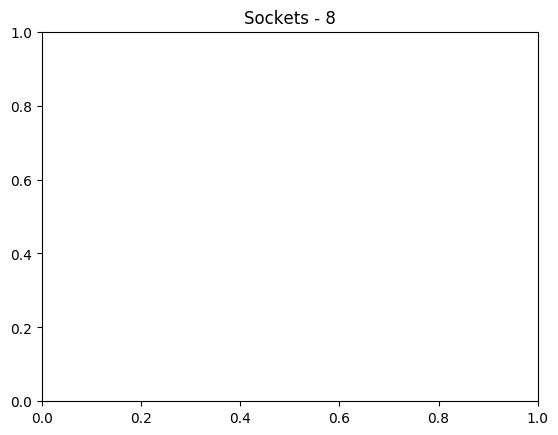

Appliance: Sockets - 8
    min_on_duration: 20
    total_activations: 0
    min(activations_duration): 0 segundos
    min(activations_length): 0


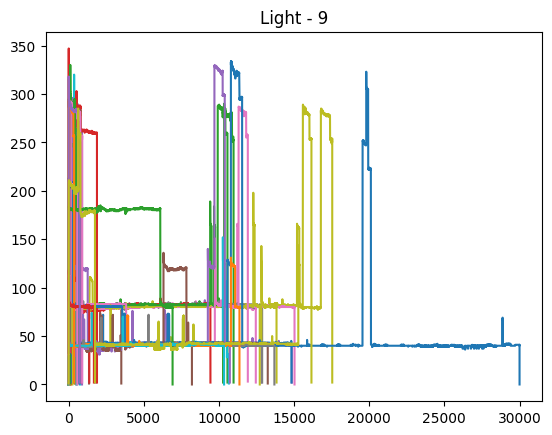

Appliance: Light - 9
    min_on_duration: 20
    total_activations: 89
    min(activations_duration): 39.0 segundos
    min(activations_length): 14


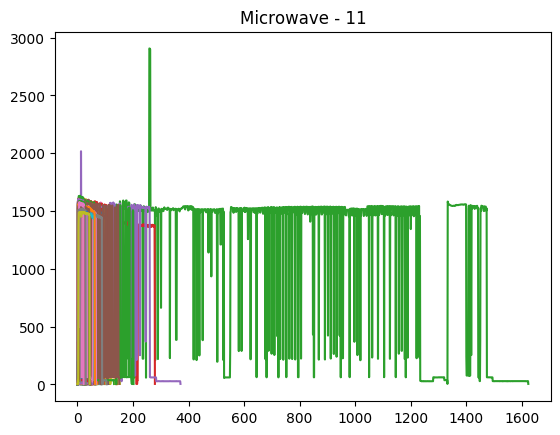

Appliance: Microwave - 11
    min_on_duration: 20
    total_activations: 329
    min(activations_duration): 27.0 segundos
    min(activations_length): 10


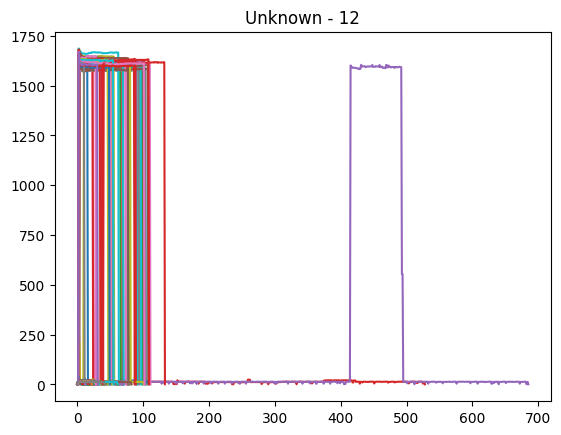

Appliance: Unknown - 12
    min_on_duration: 20
    total_activations: 348
    min(activations_duration): 27.0 segundos
    min(activations_length): 10


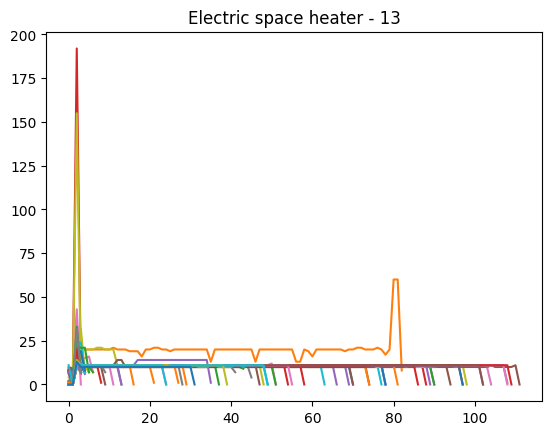

Appliance: Electric space heater - 13
    min_on_duration: 0
    total_activations: 91
    min(activations_duration): 9.0 segundos
    min(activations_length): 4


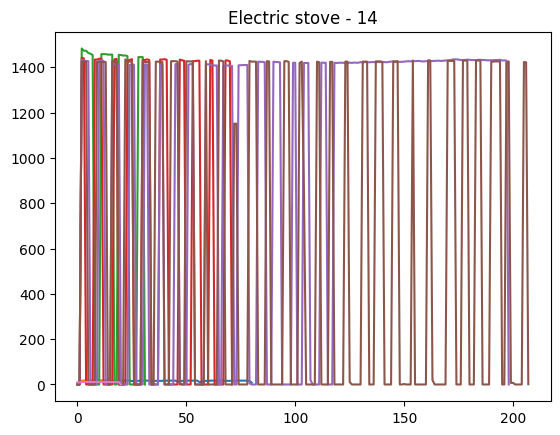

Appliance: Electric stove - 14
    min_on_duration: 20
    total_activations: 7
    min(activations_duration): 36.0 segundos
    min(activations_length): 13


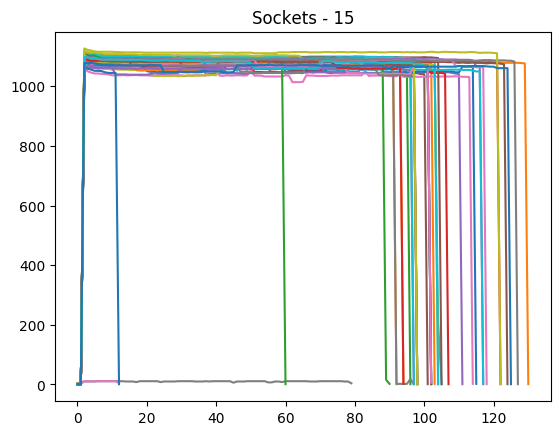

Appliance: Sockets - 15
    min_on_duration: 20
    total_activations: 41
    min(activations_duration): 36.0 segundos
    min(activations_length): 13


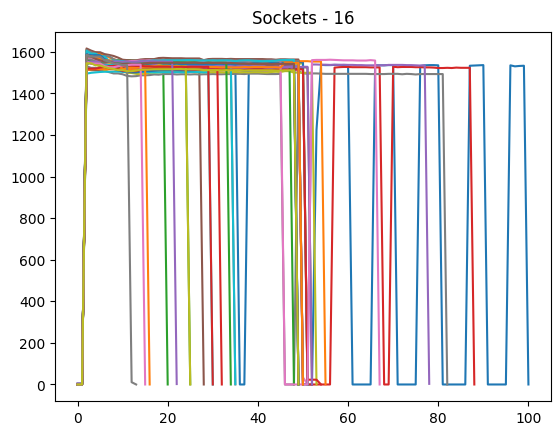

Appliance: Sockets - 16
    min_on_duration: 20
    total_activations: 39
    min(activations_duration): 39.0 segundos
    min(activations_length): 14


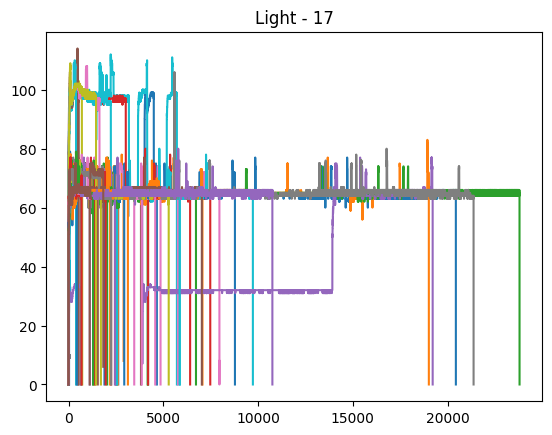

Appliance: Light - 17
    min_on_duration: 20
    total_activations: 66
    min(activations_duration): 33.0 segundos
    min(activations_length): 12


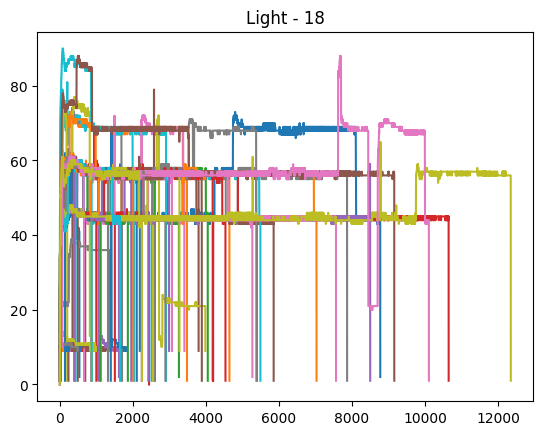

Appliance: Light - 18
    min_on_duration: 20
    total_activations: 349
    min(activations_duration): 27.0 segundos
    min(activations_length): 10


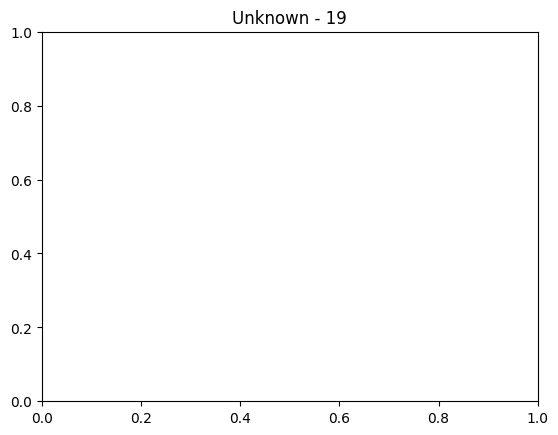

Appliance: Unknown - 19
    min_on_duration: 20
    total_activations: 0
    min(activations_duration): 0 segundos
    min(activations_length): 0
Loading data for meter ElecMeterID(instance=4, building=1, dataset='REDD')     
Done loading data all meters for this chunk.


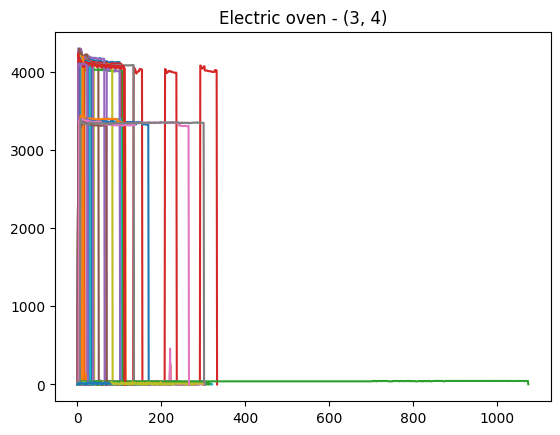

Appliance: Electric oven - (3, 4)
    min_on_duration: 20
    total_activations: 111
    min(activations_duration): 27.0 segundos
    min(activations_length): 10
Loading data for meter ElecMeterID(instance=20, building=1, dataset='REDD')     
Done loading data all meters for this chunk.


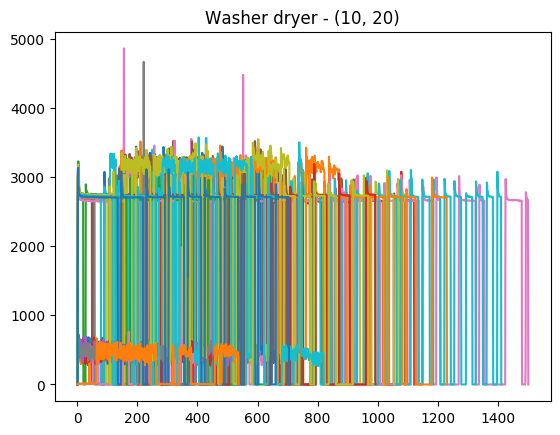

Appliance: Washer dryer - (10, 20)
    min_on_duration: 600
    total_activations: 32
    min(activations_duration): 819.0 segundos
    min(activations_length): 274

House #2


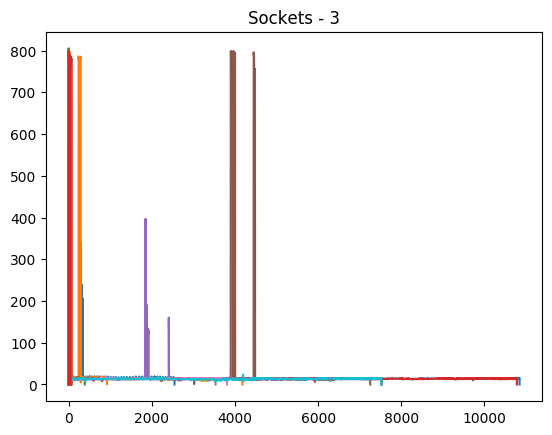

Appliance: Sockets - 3
    min_on_duration: 20
    total_activations: 34
    min(activations_duration): 66.0 segundos
    min(activations_length): 23


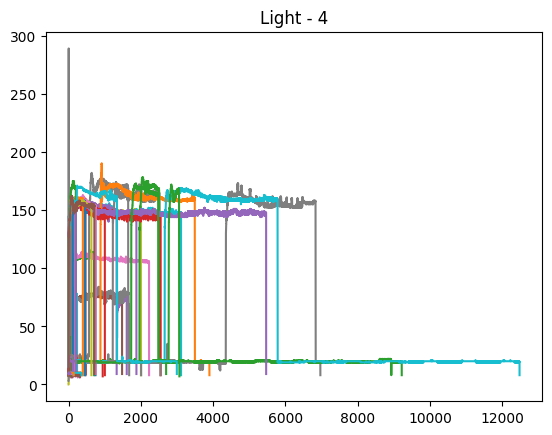

Appliance: Light - 4
    min_on_duration: 20
    total_activations: 105
    min(activations_duration): 27.0 segundos
    min(activations_length): 10


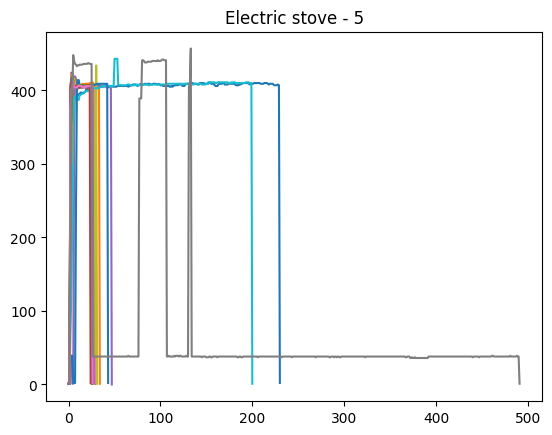

Appliance: Electric stove - 5
    min_on_duration: 20
    total_activations: 18
    min(activations_duration): 72.0 segundos
    min(activations_length): 25


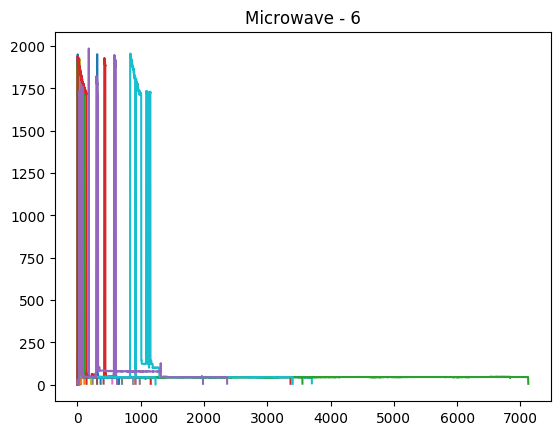

Appliance: Microwave - 6
    min_on_duration: 20
    total_activations: 65
    min(activations_duration): 42.0 segundos
    min(activations_length): 15


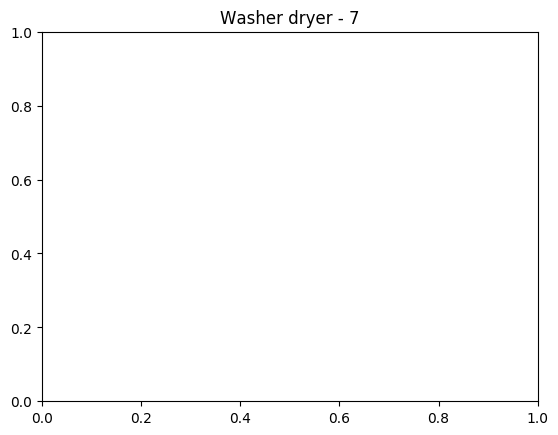

Appliance: Washer dryer - 7
    min_on_duration: 600
    total_activations: 0
    min(activations_duration): 0 segundos
    min(activations_length): 0


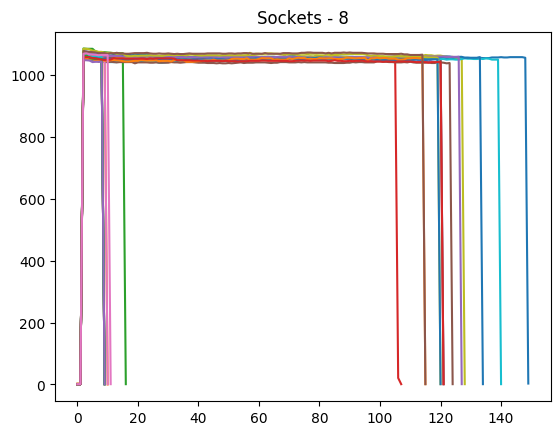

Appliance: Sockets - 8
    min_on_duration: 20
    total_activations: 27
    min(activations_duration): 27.0 segundos
    min(activations_length): 10


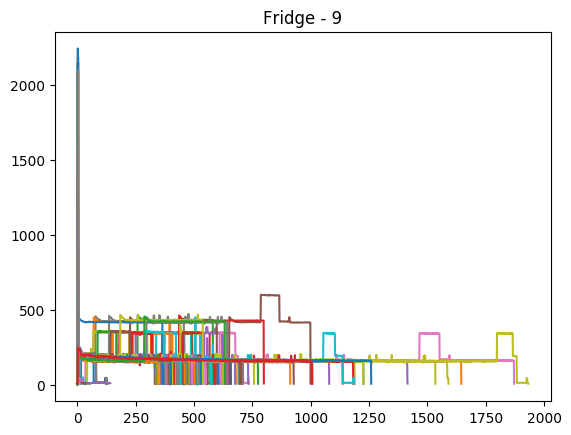

Appliance: Fridge - 9
    min_on_duration: 20
    total_activations: 394
    min(activations_duration): 27.0 segundos
    min(activations_length): 10


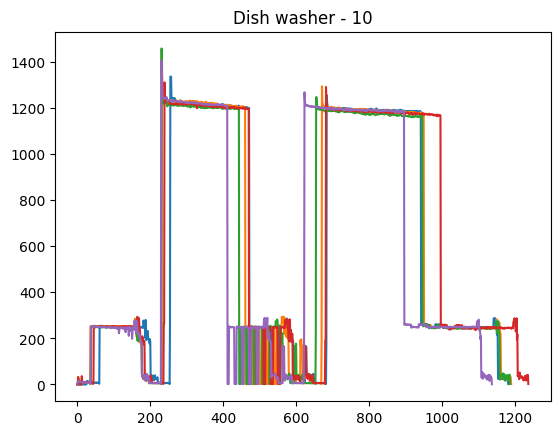

Appliance: Dish washer - 10
    min_on_duration: 600
    total_activations: 5
    min(activations_duration): 3411.0 segundos
    min(activations_length): 1138


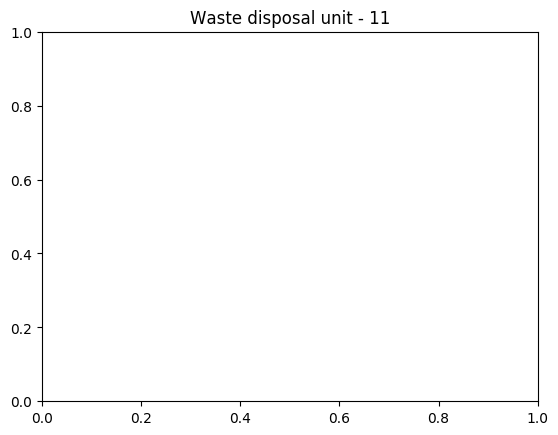

Appliance: Waste disposal unit - 11
    min_on_duration: 20
    total_activations: 0
    min(activations_duration): 0 segundos
    min(activations_length): 0

House #3


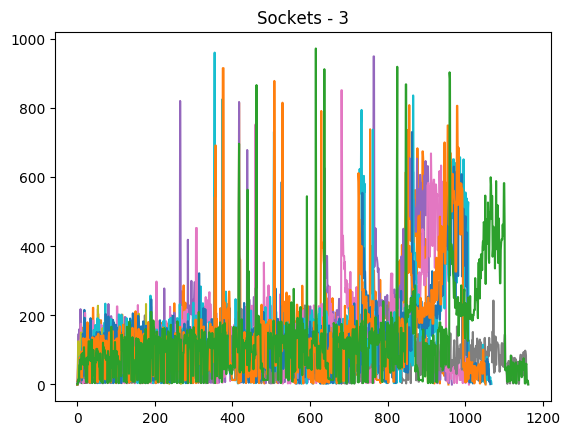

Appliance: Sockets - 3
    min_on_duration: 20
    total_activations: 13
    min(activations_duration): 57.0 segundos
    min(activations_length): 20


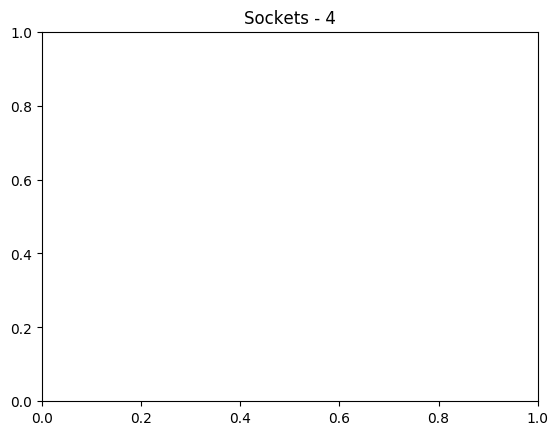

Appliance: Sockets - 4
    min_on_duration: 20
    total_activations: 0
    min(activations_duration): 0 segundos
    min(activations_length): 0


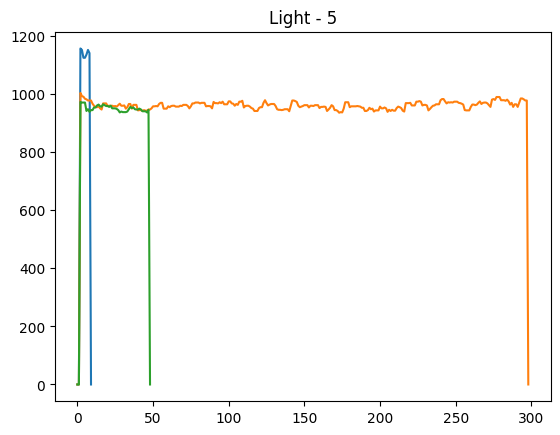

Appliance: Light - 5
    min_on_duration: 20
    total_activations: 3
    min(activations_duration): 27.0 segundos
    min(activations_length): 10


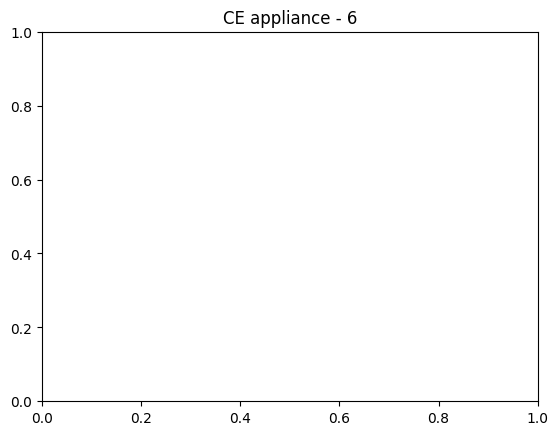

Appliance: CE appliance - 6
    min_on_duration: 20
    total_activations: 0
    min(activations_duration): 0 segundos
    min(activations_length): 0


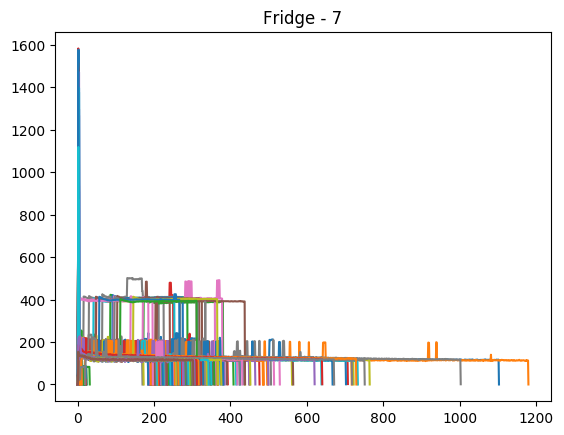

Appliance: Fridge - 7
    min_on_duration: 20
    total_activations: 726
    min(activations_duration): 27.0 segundos
    min(activations_length): 10


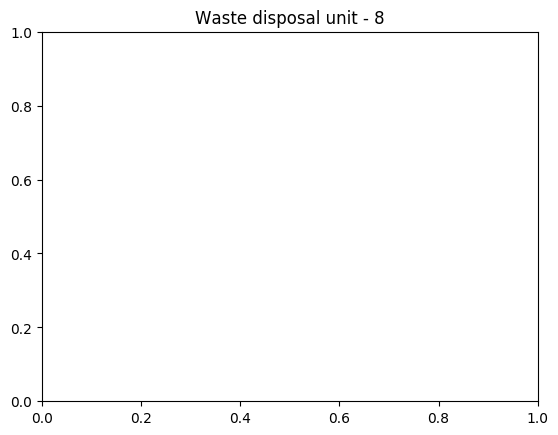

Appliance: Waste disposal unit - 8
    min_on_duration: 20
    total_activations: 0
    min(activations_duration): 0 segundos
    min(activations_length): 0


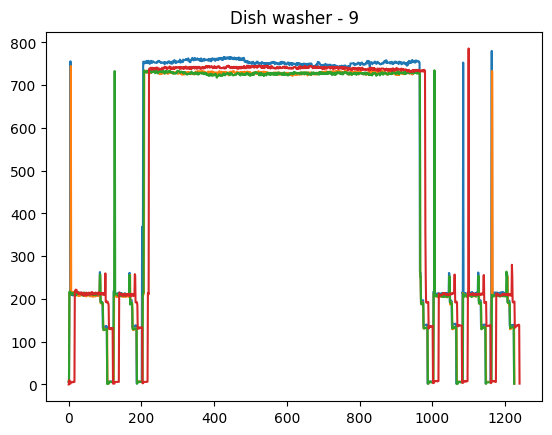

Appliance: Dish washer - 9
    min_on_duration: 600
    total_activations: 4
    min(activations_duration): 3675.0 segundos
    min(activations_length): 1226


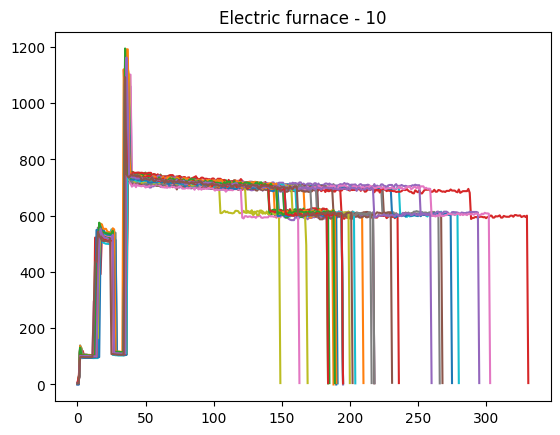

Appliance: Electric furnace - 10
    min_on_duration: 20
    total_activations: 36
    min(activations_duration): 447.0 segundos
    min(activations_length): 150


KeyboardInterrupt: 

In [98]:

dataset = redd_train.dataset

data = []
for b in dataset.buildings:
    
    print(f'House #{b}')
    
    for meter in dataset.buildings[b].elec.submeters().meters:
        
        appliance = f"{meter.label()} - {meter.instance()}"
        
        activations = meter.get_activations()
        activations_duration = []
        activations_length = []
        for activation in activations:
            duration = (activation.index[-1] - activation.index[0]).total_seconds()
            activations_duration.append(duration)
            length = len(activation)
            activations_length.append(length)
            
            data.append({
                'house': b,
                'appliance': appliance,
                'activation_duration': duration,
                'activation_length': length
            })
            plt.plot(activation.values)
        plt.title(f"{appliance}'s Activations")
        plt.show()
        
        # Additional log
        min_on_duration = meter.min_on_duration()
        total_activations = len(activations)
        min_activations_duration = min(activations_duration) if total_activations > 0 else 0
        min_activations_length = min(activations_length) if total_activations > 0 else 0

        print(f"Appliance: {appliance}")
        print(f"""    min_on_duration: {min_on_duration}
    total_activations: {total_activations}
    min(activations_duration): {min_activations_duration} segundos
    min(activations_length): {min_activations_length}""")

    print()

In [94]:
# Activations df
df_activations = pd.DataFrame(data)
df_activations

,house,appliance,activation_duration,activation_length
0,1,Fridge - 5,1521.0,508
1,1,Fridge - 5,2193.0,732
2,1,Fridge - 5,27.0,10
3,1,Fridge - 5,987.0,330
4,1,Fridge - 5,834.0,279
...,...,...,...,...
7264,6,"Air conditioner - (16, 17)",192.0,65
7265,6,"Air conditioner - (16, 17)",1011.0,338
7266,6,"Air conditioner - (16, 17)",459.0,154
7267,6,"Air conditioner - (16, 17)",594.0,199


In [96]:
df_activations.to_csv('../data/activations_window_size.csv', index=False)

In [97]:
df_activations[df_activations['house']==3].groupby(
    [
        'house', 
        'appliance'
    ]
).agg(['min', 'max', 'mean'])

activation_duration                         \
                                              min      max          mean   
house appliance                                                            
3     Dish washer - 9                      3675.0   3720.0   3687.000000   
      Electric furnace - 10                 447.0    993.0    647.750000   
      Fridge - 7                             27.0   3537.0    771.136364   
      Light - 11                             33.0  33774.0   8272.317073   
      Light - 17                             27.0  29814.0   3641.474227   
      Light - 19                             27.0  28284.0   2544.315789   
      Light - 5                              27.0    894.0    355.000000   
      Microwave - 16                         30.0   1110.0    183.367347   
      Smoke alarm - 18                       27.0    186.0    105.000000   
      Sockets - 12                           27.0  16479.0   1125.709091   
      Sockets - 21                           30.0  27615.0  15184.000000   
      Sockets - 22                           27.0  41853.0    537.000000   
      Sockets - 3                            57.0   3489.0   2056.615385   
      Unknown - 20                           39.0  13656.0    835.214286   
      Washer dryer - (13, 14)              1542.0  13413.0   4815.818182   

                              activation_length                      
                                            min    max         mean  
house appliance                                                      
3     Dish washer - 9                      1226   1241  1230.000000  
      Electric furnace - 10                 150    332   216.916667  
      Fridge - 7                             10   1180   258.045455  
      Light - 11                             12  11259  2758.439024  
      Light - 17                             10   9939  1214.824742  
      Light - 19                             10   9429   849.105263  
      Light - 5                              10    299   119.333333  
      Microwave - 16                         11    371    62.122449  
      Smoke alarm - 18                       10     63    36.000000  
      Sockets - 12                           10   5494   376.236364  
      Sockets - 21                           11   9206  5062.333333  
      Sockets - 22                           10  13952   180.000000  
      Sockets - 3                            20   1164   686.538462  
      Unknown - 20                           14   4553   279.404762  
      Washer dryer - (13, 14)               515   4472  1606.272727

### Aggregated Power Consumption (Mains)

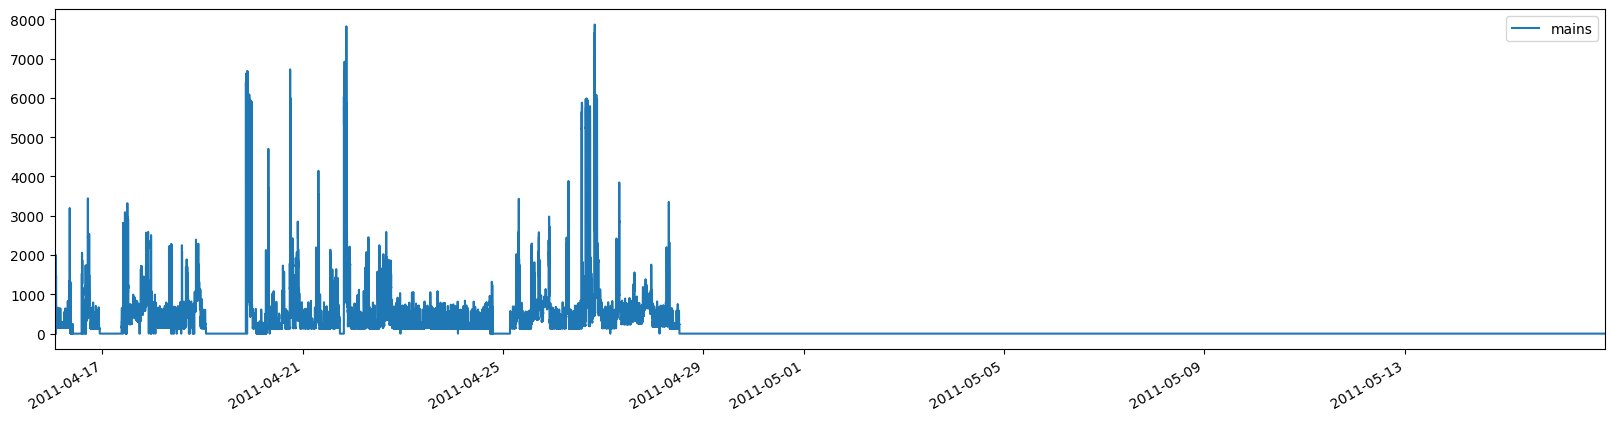

In [8]:
redd_train.data[['mains']].plot(figsize=(20, 5));

### Appliances Power Consumption

In [ ]:
fig, axes = plt.subplots(1, len(appliances_redd), figsize=(20,5))

for a, ax in zip(appliances_redd, axes):
    redd_train.data[[a]].plot(ax=ax)
    ax.set_title(a.title())

plt.suptitle("Appliances Power Consumption")
plt.tight_layout()
plt.show()

### Power Consumption Overview 

In [ ]:
fig = px.line(
    redd_train.data, 
    title=f"""Building #{building_redd} Power Consumption of {redd_train.dataset.metadata['name']} database<br><sup>From `{redd_train.start}` To `{redd_train.end}` (sample period = {sample_period})</sup>""",
)
fig.update_layout(
    xaxis_title='Datetime',
    yaxis_title="Power",
    legend_title="Legend",
)

fig.show(renderer='vscode')

### Windowing Time Series

#### Global Dataframe

In [ ]:
# Generating windows from a single dataframe, containing ALL appliance data
redd_train = DataWrapper(
    dataset_path=redd_filepath,
    building=building_redd, 
    appliances=appliances_redd,
    sample_period=sample_period,
    start='2011-04-01 00:00:00',
    end='2011-04-29 23:59:59',
    return_mode='dataframe', 
    windows_size=1000, # --------------> HERE!!!
    windows_stride=1000, # --------------> HERE!!!
    get_activations=True,
    activations_type=int,
    debug=False
    )

In [ ]:
print('Activation distribution by appliance:\n')
for a, s in redd_train.activations.items():
    print(a, '=', dict(Counter(s)))
print('\n------------------------------------------------\n')

# Generating status
print('Mains/Appliance Activations examples:\n\n')
for a in appliances_redd:
    print(f'{a.title()}:')
    
    samples = 0
    for i in range(len(redd_train.data)):
        df = redd_train.data[i][[redd_train.mains_label, a]]
        status = redd_train.activations[a][i]
        
        if status and samples < 3:
            df.plot()
            plt.title(f'Window Sample #{i} | Status = {"ON" if status else "OFF"}')
            plt.show()
            samples += 1

In [ ]:
import os
import imageio

# Saving GIF based on windows
filenames = []
for i, window in enumerate(redd_train.data[:1000]):
    window.plot()
    plt.title(f'window {i+1}')
    # gif
    filename = f'images/window_{i+1}.png'
    filenames.append(filename)
    # gif - save frame
    plt.savefig(filename)
    plt.close()
    
# gif - build it
with imageio.get_writer(
    f'images/sample{redd_train.sample_period}_windows{redd_train.windows_size}_stride{redd_train.windows_stride}.gif', 
    mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
# gif - Remove files
for filename in set(filenames):
    os.remove(filename)

#### Individual Dataframes (dict)

In [ ]:
# Generating windows from individual appliance dataframes, 
#  containing mains and appliance power consumptions information
redd_train = DataWrapper(
    dataset_path=redd_filepath,
    building=building_redd, 
    appliances=appliances_redd,
    sample_period=sample_period,
    start='2011-04-01 00:00:00',
    end='2011-04-29 23:59:59',
    return_mode='dict', # --------------> HERE!!!
    windows_size=1000, # --------------> HERE!!!
    windows_stride=1000, # --------------> HERE!!!
    get_activations=False,
    activations_type=int,
    debug=False
    )

In [ ]:
print('Windows by Appliance:\n')
for k, v in redd_train.data.items():
    print(k, '=>', len(v), 'window samples')

## Additional Research

### Optimizing RP parameters - `Time Delay` and `Embedding Dimension`

In [ ]:
from src.timeseries import RecurrencePlot

# RP parameters
time_delay = 1
embedding_dimension = 2

# Sample data
redd_train = DataWrapper(
    dataset_path=redd_filepath,
    building=building_redd, 
    appliances=appliances_redd,
    sample_period=sample_period,
    start='2011-04-01 00:00:00',
    end='2011-04-29 23:59:59',
    return_mode='dataframe',
    windows_size=None,
    windows_stride=None,
    get_activations=True,
    activations_type=int,
    debug=False
    )

In [ ]:
# Recurrence Plot Wrapper
rp_mains = RecurrencePlot(
    data=redd_train.data['mains'].values
    )

##### `Time Delay` - Mutual Information Method

In [ ]:
delay, mutual_information = rp_mains.calculate_mutual_information(delay_range=20, debug=True)
delay, mutual_information

##### `Threshold` - False Nearest Neighbor Method

In [ ]:
embedding_dimension, false_neighbors = rp_mains.calculate_embedding_dimension(max_dimensions=15, debug=True)
embedding_dimension, false_neighbors